# 고객 세분화 실습

## *1*. 환경 설정




### 1.1 분서에 필요한 library 호출 및 google drive 연결

In [1]:
# 분석에 필요한 library 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *2*. 데이터 불러오기


### 2.1 데이터 불러오기 및 확인

In [3]:
# 왼쪽 네비게이션바에서 \drive\Mydrive에 연결된 드라이브에서 data.csv 위치를 찾아서 "..."을 클릭하여 경로복사 후  pd.read_csv의 경로에 붙여넣기
df_org = pd.read_csv('/content/drive/MyDrive/data/data.csv', encoding= 'latin')
df_org.head() #데이터 확인

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_org.tail() #데이터 확인

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2.2 데이터 형변

In [6]:
# 문자열 변수를 datetime 으로 변환 (후반부에서...)
# df_org['InvoiceDate'] = pd.DatetimeIndex(df_org['InvoiceDate'])
# df_org.info()

## 3.NULL 값 처리
### 3.1 NULL 값 확인

In [7]:
# Null 값이 있는 전체 case 수 확인
df_org.isnull().sum().sum()

136534

In [8]:
# Null 값의 비율
df_org.isnull().sum().sum() / df_org.shape[0]

0.2519500506542611

In [9]:
# Null 값이 있는 변수 확인
df_org.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 3.1 Question
- CustomerID 가 Null인 경우가 정상일까?
- 만약 Null 인 경우가 정상이라면 분석에 사용할 수 있을까?

In [10]:
# CustomerID 가 Null 인 case  확인하기
df_org[df_org.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


### 3.2 NULL 값 처리 (삭제) 및 확인

In [11]:
df_na_treat =  df_org.dropna(axis = 0)

In [12]:
# 만약 CustomerID 에서만 NULL 값을 제외하겠다. 라고 한다면 어떻게 해야할까요 ?

# df_na_treat =  df_org.dropna(subset=['CustomerID'])

## https://wikidocs.net/153202 참고

In [13]:
df_na_treat.isnull().sum().sum()

0

In [14]:
df_na_treat.shape

(406829, 8)

## *4*. 데이터탐색 및 이상치 제거

### 4.1 이상치 확인

In [15]:
df_na_treat.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
# 이상치 케이스 확인
df_na_treat[(df_na_treat.Quantity == -80995) | (df_na_treat.Quantity == 80995) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [17]:
# Quantity 이상치 case 확인
df_na_treat[df_na_treat.Quantity <= 0 ].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [18]:
# 음수값으로 시작하는 case는 InvocieNo 가 'C' 로 시작 하는 경우와 case 가 동일함
df_na_treat['InvoiceNo'].str.startswith("C").value_counts()

InvoiceNo
False    397924
True       8905
Name: count, dtype: int64

In [19]:
df_na_treat[(df_na_treat.Quantity <= 0) & (df_na_treat.InvoiceNo.str.startswith("C"))].shape

(8905, 8)

In [20]:
# UnitPirce 가 가장 큰 값도 환불 case 임
df_na_treat[df_na_treat.UnitPrice == 38970]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [21]:
df_na_treat[df_na_treat.UnitPrice == 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


### 4.2 EDA


In [22]:
# df_na_treat = df_na_treat[(df_na_treat['Quantity']>0)&(df_na_treat['UnitPrice']>0) ]

In [23]:
# 연속형 변수의 대략적인 분포 확인

df_na_treat.describe()

# 확인 필요한 부분
## 1. Quantity 음수와 매우 큰수가 있다.
## 2. 가격의 max 값이 너무 크다 이상치일 가능성이 있다.


,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: xlabel='Quantity'>

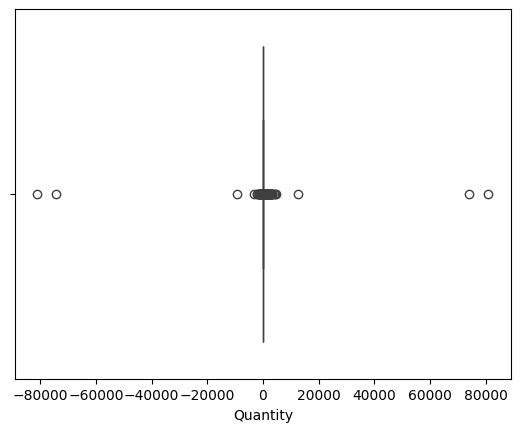

In [24]:
sns.boxplot(x= df_na_treat['Quantity'])
## 최소값과 최댓값을 다 표현해주다 보면 그래프가 너무 작게 나올 수 있음 (해석하기 어려움)
## plt.xlim(최소값,최대값)을 넣어 우리가 보고싶은 부분을 확대해서 봐야함

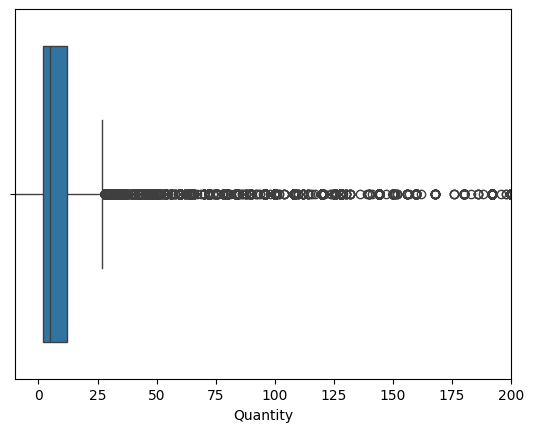

In [25]:
# 한번에 구매하는 수량의 분포는 어떻게 되는가 ?
sns.boxplot(x = df_na_treat['Quantity'])
plt.xlim(-10,200)
plt.show()

In [26]:
df_na_treat['Quantity'].quantile(q=0.99,  interpolation='nearest')

120

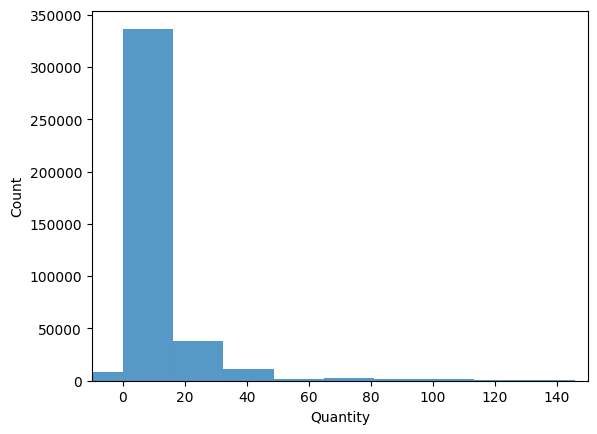

In [27]:
sns.histplot(df_na_treat['Quantity'], bins = 10000)
plt.xlim(-10,150)
plt.show()

#### UnitPrice

<Axes: xlabel='UnitPrice'>

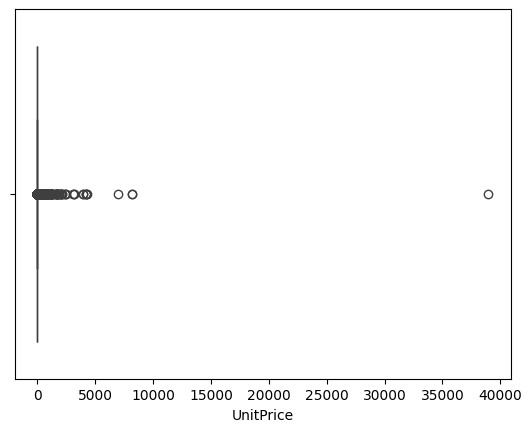

In [28]:
sns.boxplot(x= df_na_treat['UnitPrice'])

(-10.0, 100.0)

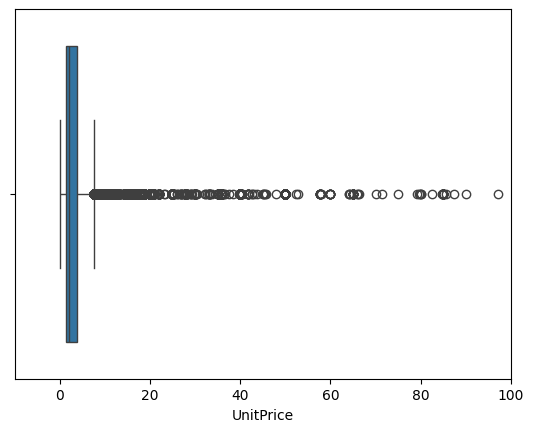

In [29]:
sns.boxplot(x= df_na_treat['UnitPrice'])
plt.xlim(-10,100)

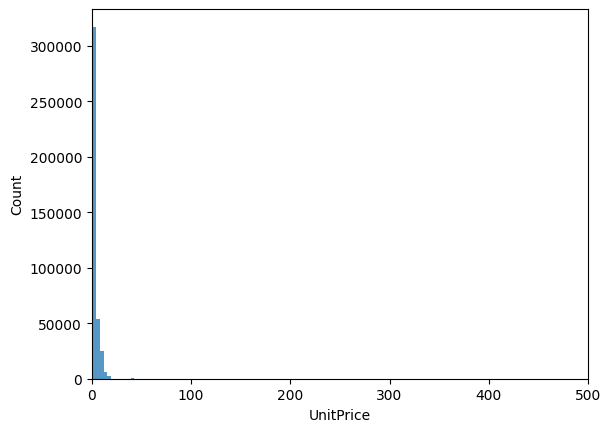

In [30]:
sns.histplot(x= df_na_treat['UnitPrice'], bins =10000)
plt.xlim(0,500)
plt.show()

In [31]:
#  어떤 데이터인지 case 확인
df_na_treat[df_na_treat.UnitPrice >= 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45622,C540271,M,Manual,-1,1/6/2011 11:51,1126.00,12503.0,Spain
73446,C542348,M,Manual,-1,1/27/2011 12:09,1715.85,12539.0,Spain
117052,C546325,M,Manual,-1,3/11/2011 10:15,1687.17,14911.0,EIRE
117053,C546327,M,Manual,-1,3/11/2011 10:18,1687.17,14911.0,EIRE
117054,546328,M,Manual,1,3/11/2011 10:19,1687.17,14911.0,EIRE
117055,546329,M,Manual,1,3/11/2011 10:22,1687.17,14911.0,EIRE
144826,548813,M,Manual,1,4/4/2011 13:03,2382.92,12744.0,Singapore
144828,548813,M,Manual,1,4/4/2011 13:03,1252.95,12744.0,Singapore
144829,548820,M,Manual,1,4/4/2011 13:04,2053.07,12744.0,Singapore
144831,C548830,M,Manual,-1,4/4/2011 13:08,2382.92,12744.0,Singapore


In [32]:
# 값이 1000 이상인 case 갯수 확인
df_na_treat[df_na_treat.UnitPrice >= 1000].shape

(46, 8)

#### InvoiceDate

In [33]:
# 날짜 범위 확인, 튀는 날이 있을까? 확인  (일단위 요약)
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).min())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).max())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D').value_counts().head(20))

2010-12-01 08:26:00
2011-12-09 12:50:00
InvoiceDate
2011-11-06    3434
2011-12-05    3398
2011-11-23    3332
2011-11-10    3194
2011-11-20    3112
2011-11-17    3034
2011-11-14    2964
2011-10-30    2907
2011-10-06    2870
2011-11-22    2862
2011-11-28    2789
2011-10-10    2783
2011-11-16    2772
2011-11-13    2757
2011-11-29    2736
2010-12-05    2724
2011-12-06    2654
2011-12-08    2599
2011-11-04    2571
2011-09-22    2505
Freq: D, Name: count, dtype: int64


In [34]:
# 월단위 요약
pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('M').value_counts()

InvoiceDate
2011-11    65598
2011-10    50695
2011-09    40822
2011-05    28908
2011-06    27836
2011-03    27822
2011-08    27662
2011-07    27502
2010-12    26850
2011-04    23198
2011-01    21912
2011-02    20363
2011-12    17661
Freq: M, Name: count, dtype: int64

In [35]:
# 주단위 요약하려면??

In [36]:
df_na_treat.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [37]:
df_na_treat['Country'].value_counts()
# df_na_treat['Country'].value_cunts().sum()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


#### InvoiceDate

In [38]:
df_na_treat

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [39]:
# 가장 많이 거래된 상품은
df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2070
22423      REGENCY CAKESTAND 3 TIER              1905
85099B     JUMBO BAG RED RETROSPOT               1662
84879      ASSORTED COLOUR BIRD ORNAMENT         1418
47566      PARTY BUNTING                         1416
20725      LUNCH BAG RED RETROSPOT               1358
22720      SET OF 3 CAKE TINS PANTRY DESIGN      1232
POST       POSTAGE                               1196
20727      LUNCH BAG  BLACK SKULL.               1126
21212      PACK OF 72 RETROSPOT CAKE CASES       1080
dtype: int64

In [40]:
df_na_treat.duplicated().sum()

5225

### 4.3 데이터 cleansing
 1. 환불 제거
 2. 무료구매인건 제거  
 3. CustomerId NULL 제거
 4. 중복 데이터 제

In [41]:
df_outlier_treat = df_na_treat[(df_na_treat.Quantity > 0) & (df_na_treat.UnitPrice != 0) & (~df_na_treat.CustomerID.isnull())]
df_outlier_treat = df_outlier_treat[~df_outlier_treat.duplicated()]
df_outlier_treat.shape

(392692, 8)

In [42]:
df_outlier_treat

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# *5*. 유저단위 스코어링을 위해 데이터 요약



### 5.1 Frequecy(구매 건수)생성


In [43]:
df_outlier_treat.groupby(['CustomerID','InvoiceNo']).size().to_frame()

0
CustomerID InvoiceNo    
12346.0    541431      1
12347.0    537626     31
           542237     29
           549222     24
           556201     18
...                   ..
18283.0    579673     50
           580872     50
18287.0    554065     29
           570715     38
           573167      3

[18532 rows x 1 columns]

In [44]:
# frequecy(구매 건수)계산을 위해 CustomerId, InvoiceNo 별로 요약
temp_frequecy = df_outlier_treat.groupby(['CustomerID']).InvoiceNo.nunique()
temp_frequecy

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4338, dtype: int64

<ipython-input-45-fdc8bcbcf760>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_frequecy)


<Axes: xlabel='InvoiceNo', ylabel='Density'>

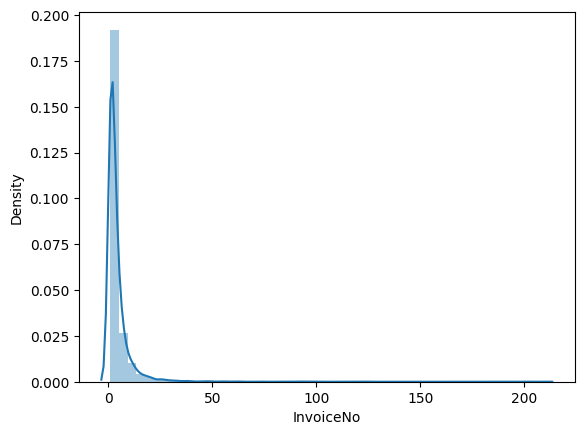

In [45]:
sns.distplot(temp_frequecy)

In [46]:
#
temp_frequecy.to_frame()
df_frequecy = temp_frequecy.reset_index().rename(columns = {'index' :'CustomerID'})
df_frequecy.columns = ['CustomerID','frequecy']
df_frequecy

,CustomerID,frequecy
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


## 5.2 Moneytery(유저별 구매금액) 생성


<ipython-input-47-a094f2160901>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_monitery)


<Axes: xlabel='monitery', ylabel='Density'>

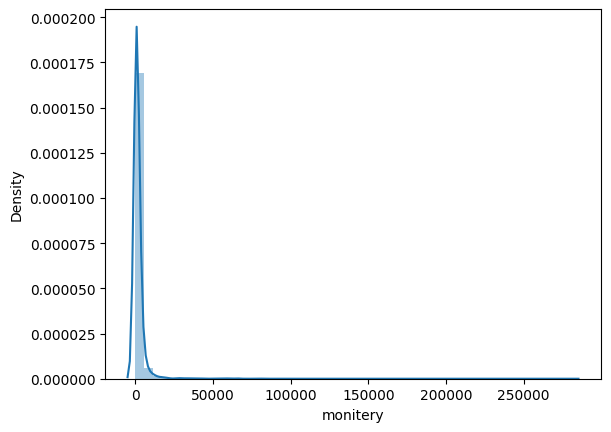

In [47]:
temp = df_outlier_treat[['CustomerID','Quantity','UnitPrice']].copy()
temp['monitery'] = temp['Quantity'] * temp['UnitPrice']
temp_monitery = temp.groupby(['CustomerID']).monitery.sum()
temp_monitery.head()
sns.distplot(temp_monitery)

In [48]:
df_monitery = temp_monitery.to_frame()
df_monitery = df_monitery.reset_index().rename(columns = {'index' :'CustomerID'})
df_monitery

,CustomerID,monitery
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


## 5.3 Recency (유저별 최근 거래) 생성
 - 오늘을 2011-12-10일 로 가정  

In [49]:
temp2 = df_outlier_treat[['CustomerID','InvoiceDate']].copy()
temp2['today'] ="2011-12-10"

temp2['diff_days'] = (pd.to_datetime(temp2['today']) - pd.to_datetime(temp2['InvoiceDate'])).dt.days
recency = temp2.groupby('CustomerID').diff_days.min()
recency

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: diff_days, Length: 4338, dtype: int64

In [50]:
df_recency = recency.to_frame()
df_recency = df_recency.reset_index().rename(columns = {'index' :'CustomerID', 'diff_days' :'recency'})
df_recency

,CustomerID,recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


In [51]:
rfm = pd.merge(df_frequecy, df_recency, how = 'inner', on ='CustomerID')


## 5.4 RFM 스코어 생성

In [52]:
# R,F,M 데이터 통합
RFM_data = pd.merge(rfm, df_monitery, how ='inner', on= 'CustomerID')
RFM_data

,CustomerID,frequecy,recency,monitery
0,12346.0,1,325,77183.60
1,12347.0,7,2,4310.00
2,12348.0,4,75,1797.24
3,12349.0,1,18,1757.55
4,12350.0,1,310,334.40
...,...,...,...,...
4333,18280.0,1,277,180.60
4334,18281.0,1,180,80.82
4335,18282.0,2,7,178.05
4336,18283.0,16,3,2045.53


In [53]:
# 각 분위수별 값 설정 및 total 스코어 생성

#RFM_data['fre_score'] = pd.qcut(RFM_data['frequecy'],4, labels =[1,2,3,4])
## 값이 중복이 많아서 동일한 값들을 하나의 구간으로 나눌수 없는 문제가 발생
## 이를 해결하기 위해 구간이 나눠질 수 없는 구간은 제거(drop) 하는 옵션 사용
## 구간이 하나 줄어 들면서 labels 값도 3개로 사용

RFM_data['fre_score'] = pd.qcut(RFM_data['frequecy'],4, labels =[1,2,3],duplicates ='drop')
RFM_data['rec_score'] = pd.qcut(RFM_data['recency'] ,4, labels =[4,3,2,1]) # 최근성은 값이 낮을 수록 높은 점수를 받도록 순서를 바꿈
RFM_data['mon_score'] = pd.qcut(RFM_data['monitery'],4, labels =[1,2,3,4])
RFM_data['total_score'] = RFM_data['fre_score'].astype(int) + RFM_data['rec_score'].astype(int) + RFM_data['mon_score'].astype(int)
RFM_data.head(10)

,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score
0,12346.0,1,325,77183.60,1,1,4,6
1,12347.0,7,2,4310.00,3,4,4,11
2,12348.0,4,75,1797.24,2,2,4,8
3,12349.0,1,18,1757.55,1,3,4,8
4,12350.0,1,310,334.40,1,1,2,4
5,12352.0,8,36,2506.04,3,3,4,10
6,12353.0,1,204,89.00,1,1,1,3
7,12354.0,1,232,1079.40,1,1,3,5
8,12355.0,1,214,459.40,1,1,2,4
9,12356.0,3,22,2811.43,2,3,4,9


<Axes: xlabel='total_score'>

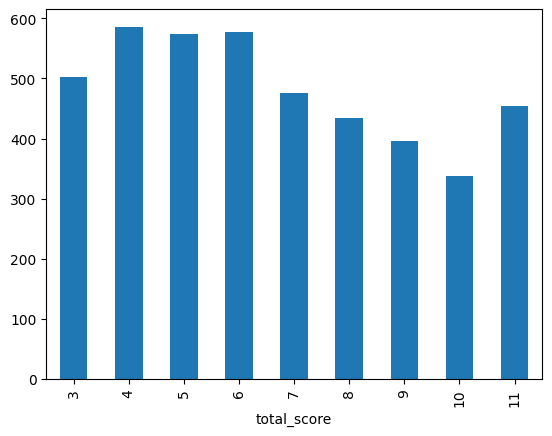

In [54]:
# 데이터 분포 시각화
RFM_data['total_score'].value_counts().sort_index().plot(kind='bar')

## 5.5 RFM 축약

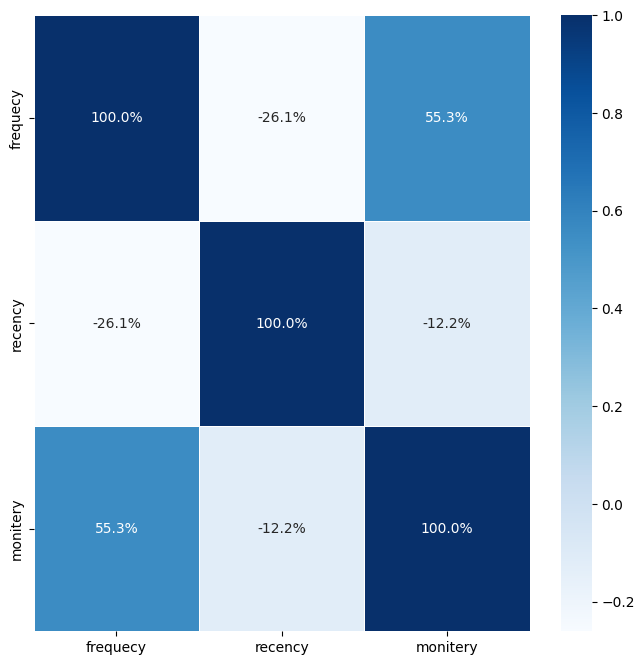

In [55]:
#  RFM 점수 상관분석
plt.figure(figsize =(8,8))
sns.heatmap(data = RFM_data[['frequecy','recency','monitery']].corr(),annot= True,
            fmt ='.1%', linewidths =.5, cmap='Blues')
plt.show()
## M(구매금액) 과 F(구매횟수) 점수의 상관관계가 55.3% 로 상대적으로 구매횟수와 구매 금액이 양의 상관관계가 있음을 알수 있음
## R(최근성)은 M(구매금액) 과 F(구매횟수) 점수와 음의 상관관계로 나타남.
## 최근성을 제외 (1년으로 고정을 한다는 가정)하고 M과 F의 점수만 사용하여 FM 모형으로 축약

In [56]:
# FM 모형의 분포 확인
df_count_pivot = RFM_data[['fre_score', 'mon_score']].value_counts(sort= False,normalize=True).sort_index().to_frame().unstack()
df_count_pivot

proportion                              
mon_score          1         2         3         4
fre_score                                         
1           0.240433  0.193868  0.085523  0.016828
2           0.009221  0.054633  0.131627  0.066851
3           0.000461  0.001383  0.032734  0.166436

<Axes: xlabel='None-mon_score', ylabel='fre_score'>

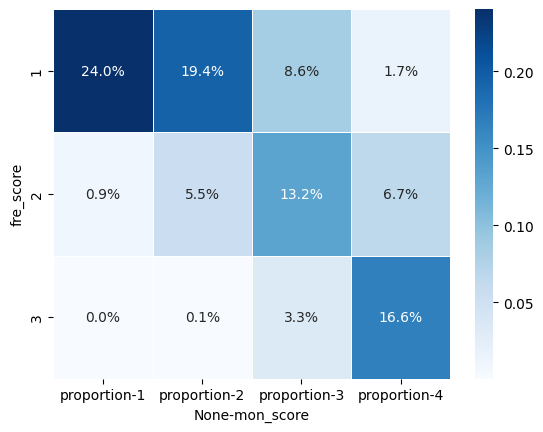

In [57]:
# FM 모형의 분포 시각화
sns.heatmap(df_count_pivot, annot= True, fmt ='.1%', linewidths =.5, cmap='Blues')

In [58]:
# 전체 데이터 수 확인
print(RFM_data.shape)
##  유저 4338명에 대해  8개 변수 생성
RFM_data.head()

(4338, 8)


,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score
0,12346.0,1,325,77183.60,1,1,4,6
1,12347.0,7,2,4310.00,3,4,4,11
2,12348.0,4,75,1797.24,2,2,4,8
3,12349.0,1,18,1757.55,1,3,4,8
4,12350.0,1,310,334.40,1,1,2,4


In [59]:
# FM 스코어만 적용 하여 해당월 저장
FM_score = RFM_data[['CustomerID', 'frequecy', 'monitery', 'fre_score', 'mon_score']].copy()
FM_score['fre_score'] =FM_score['fre_score'].astype(int)
FM_score['mon_score'] =FM_score['mon_score'].astype(int)
FM_score['fm_score']= FM_score['fre_score'] + FM_score['mon_score']
FM_score['create_date'] =  '2012-01-01'  # 2011년 12월 기준 score 로 2012년 사용 목적 저장
FM_score.head()

,CustomerID,frequecy,monitery,fre_score,mon_score,fm_score,create_date
0,12346.0,1,77183.60,1,4,5,2012-01-01
1,12347.0,7,4310.00,3,4,7,2012-01-01
2,12348.0,4,1797.24,2,4,6,2012-01-01
3,12349.0,1,1757.55,1,4,5,2012-01-01
4,12350.0,1,334.40,1,2,3,2012-01-01


# *6*.심화 적용 (직접 해보기)


## 6.1 구간을 분위수를 보고 cut-off 정의하기

### 분위 수 사용시 장단점
- 분위수를 사용하면 매번 RFM 구간별 동일 유저수가 들어가기 때문에 유저수는 동일하게됨
- 매번 기준이 달라지기 때문에 (크게 변하지는 않지만) 혼란이 될 수 있음
- 그렇기 때문에 분위수를 참고하여 cut-off 값을 정의해주는것이 필요함
- cut-off 값을 정의해 사용하면 각 그룹의 비율이 매번 어떻게 변하는 것인지 확인할 수 있음




In [60]:
# 구간별 최대 최소값 확인하기
# 1. 분위수부터 보고

RFM_data.describe()

,CustomerID,frequecy,recency,monitery,total_score
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,4.272015,92.059474,2048.688081,6.670124
std,1721.808492,7.697998,100.012264,8985.230220,2.543010
min,12346.000000,1.000000,0.000000,3.750000,3.000000
25%,13813.250000,1.000000,17.000000,306.482500,4.000000
50%,15299.500000,2.000000,50.000000,668.570000,6.000000
75%,16778.750000,5.000000,141.750000,1660.597500,9.000000
max,18287.000000,209.000000,373.000000,280206.020000,11.000000


In [61]:
# 구간별 최대 최소값 확인하기
# 2. 각 구간별 유저수 확인

print(RFM_data.groupby('rec_score').recency.agg(['min', 'max', 'count']))
print(RFM_data.groupby('fre_score').frequecy.agg(['min', 'max', 'count']))
print(RFM_data.groupby('mon_score').monitery.agg(['min', 'max', 'count']))


           min  max  count
rec_score                 
4            0   17   1103
3           18   50   1073
2           51  141   1077
1          142  373   1085
           min  max  count
fre_score                 
1            1    2   2328
2            3    5   1138
3            6  209    872
               min        max  count
mon_score                           
1             3.75     306.46   1085
2           306.55     668.56   1084
3           668.58    1659.75   1084
4          1660.88  280206.02   1085



### 구간별 값을 설정
#### res_score는
- 4점 : 2주일 이내 (1~14일까지)
- 3점 : 2개월 이내 (15~60일까지)
- 2점 : 6개월 이내 (61~ 180일까지)
- 1점 : 6개월 초과 (181~ )

#### fre_score는
- 1점 : 1번 구매
- 2점 : 2번 구매  
- 3점 : 3~5번 구매
- 4점 : 6번 이상

#### mon_score는
- 4점 : 2000 초과
- 3점 : 2000 이하   
- 2점 : 600 이하
- 1점 : 300 이하



In [69]:
# 구간화 방법 1
RFM_data['adj_rec_score'] = RFM_data['recency'].apply(lambda x: 4 if x < 15 else (3 if x < 61 else (2 if x < 181 else (1 if x > 181 else 0))))
RFM_data['adj_fre_score'] = RFM_data['frequecy'].apply(lambda x: 1 if x <= 1 else (2 if x <= 2 else (3 if x <= 5 else (4 if x > 5 else 0))))
RFM_data['adj_mon_score'] = RFM_data['monitery'].apply(lambda x: 1 if x <= 300 else (2 if x <= 600 else (3 if x <= 2000 else (4 if x > 2000 else 0))))
RFM_data['adj_total_score'] = RFM_data['adj_rec_score'] + RFM_data['adj_fre_score'] + RFM_data['adj_mon_score']
RFM_data.head()

,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score,adj_rec_score,adj_fre_score,adj_mon_score,adj_total_score,FM_seg
0,12346.0,1,325,77183.60,1,1,4,6,1,1,4,6,C
1,12347.0,7,2,4310.00,3,4,4,11,4,4,4,12,A
2,12348.0,4,75,1797.24,2,2,4,8,2,3,3,8,B
3,12349.0,1,18,1757.55,1,3,4,8,3,1,3,7,C
4,12350.0,1,310,334.40,1,1,2,4,1,1,2,4,D


In [63]:
# 구간화 방법 2
# bins =[0,15,61,181,400]
# RFM_data['rec_score'] = pd.cut(RFM_data['recency'],bins,right= False,labels= [4,3,2,1])


<Axes: xlabel='adj_total_score'>

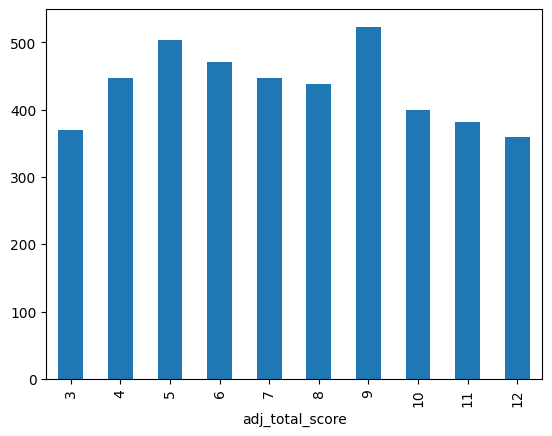

In [64]:
# 데이터 분포 시각화
RFM_data['adj_total_score'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='None-adj_mon_score', ylabel='adj_fre_score'>

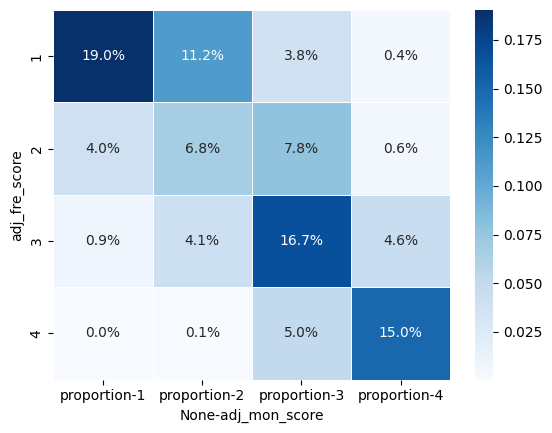

In [65]:
df_adj_count_pivot = RFM_data[['adj_fre_score', 'adj_mon_score']].value_counts(sort= False,normalize=True).sort_index().to_frame().unstack()
sns.heatmap(df_adj_count_pivot, annot= True, fmt ='.1%', linewidths =.5, cmap='Blues')

## 6.2 구간 통합
### F와 M 스코어의 조합이 너무 많습다는 지적이 나왔습니다.
### 유사한 주변의 그룹을 통합하여 5단계로 줄이고자 합니다. 최소 비율 5% 이상으로 유지하도록 구성하도록 python 스크립트를 완성해보시오.
- 참고 :

 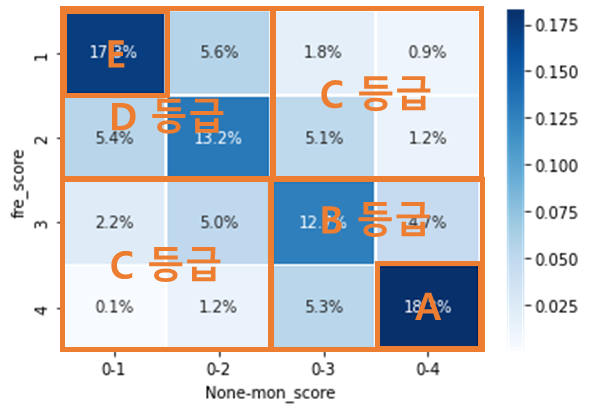
- 결과를 FM_score 데이터 프레임의 df_fm_com에 저장해 보시오



In [66]:
RFM_data['FM_seg'] = np.nan
RFM_data.loc[(RFM_data['adj_fre_score'] >= 3) & (RFM_data['adj_mon_score'] >= 3),'FM_seg'] = "B"
RFM_data.loc[(RFM_data['adj_fre_score'] == 4) & (RFM_data['adj_mon_score'] == 4),'FM_seg'] = "A"
RFM_data.loc[(RFM_data['adj_fre_score'] <= 2) & (RFM_data['adj_mon_score'] <= 2),'FM_seg'] = "D"
RFM_data.loc[(RFM_data['adj_fre_score'] == 1) & (RFM_data['adj_mon_score'] == 1),'FM_seg'] = "E"
RFM_data.loc[RFM_data['FM_seg'].isnull(),'FM_seg'] = "C"

In [67]:
RFM_data.FM_seg.value_counts()

FM_seg
B    1138
D     952
E     826
C     771
A     651
Name: count, dtype: int64

In [68]:
RFM_data[RFM_data['FM_seg']== "E"]

,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score,adj_rec_score,adj_fre_score,adj_mon_score,adj_total_score,FM_seg
6,12353.0,1,204,89.00,1,1,1,3,1,1,1,3,E
14,12361.0,1,287,189.90,1,1,1,3,1,1,1,3,E
19,12367.0,1,4,168.90,1,4,1,6,4,1,1,6,E
43,12401.0,1,303,84.30,1,1,1,3,1,1,1,3,E
44,12402.0,1,323,225.60,1,1,1,3,1,1,1,3,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,18274.0,1,30,175.92,1,3,1,5,3,1,1,5,E
4331,18277.0,1,58,110.38,1,2,1,4,3,1,1,5,E
4332,18278.0,1,73,173.90,1,2,1,4,2,1,1,4,E
4333,18280.0,1,277,180.60,1,1,1,3,1,1,1,3,E
